In [1]:
import numpy as np
import random

from cs224d.data_utils import *

from q1_softmax import softmax
from q2_gradcheck import gradcheck_naive
from q3_sgd import load_saved_params

def getSentenceFeature(tokens, wordVectors, sentence):
    """ Obtain the sentence feature for sentiment analysis by averaging its word vectors """
    # Implement computation for the sentence features given a sentence.                                                       
    
    # Inputs:                                                         
    # - tokens: a dictionary that maps words to their indices in    
    #          the word vector list                                
    # - wordVectors: word vectors (each row) for all tokens                
    # - sentence: a list of words in the sentence of interest 

    # Output:                                                         
    # - sentVector: feature vector for the sentence    
    
    sentVector = np.zeros((wordVectors.shape[1],))
    
    ### YOUR CODE HERE
    for word in sentence:
    	sentVector += wordVectors[tokens[word]]
    sentVector /= len(sentence)
    ### END YOUR CODE
    
    return sentVector


In [2]:
    random.seed(314159)
    np.random.seed(265)

    dataset = StanfordSentiment()
    tokens = dataset.tokens()
    nWords = len(tokens)

    _, wordVectors0, _ = load_saved_params()
    wordVectors = (wordVectors0[:nWords,:] + wordVectors0[nWords:,:])
    dimVectors = wordVectors.shape[1]

    dummy_weights = 0.1 * np.random.randn(dimVectors, 5)
    dummy_features = np.zeros((10, dimVectors))
    dummy_labels = np.zeros((10,), dtype=np.int32)    
    for i in xrange(10):
        words, dummy_labels[i] = dataset.getRandomTrainSentence()
        dummy_features[i, :] = getSentenceFeature(tokens, wordVectors, words)


In [19]:
features = dummy_features
labels = dummy_labels
weights = dummy_weights
regularization = 1

In [20]:
    prob = softmax(features.dot(weights))
    if len(features.shape) > 1:
        N = features.shape[0]
    else:
        N = 1
    # A vectorized implementation of    1/N * sum(cross_entropy(x_i, y_i)) + 1/2*|w|^2
    cost = np.sum(-np.log(prob[range(N), labels])) / N 
    cost += 0.5 * regularization * np.sum(weights ** 2)


In [27]:
    D = features.shape[1]
    grad = regularization * weights
    for n in range(N):
    	grad += np.outer(features[n], prob[n]) / N
    	grad[:, labels[n]] -= features[n] / N



In [30]:
grad.shape

(10, 5)

In [31]:
import numpy as np
import matplotlib.pyplot as plt

In [42]:
results = [{
        "reg": 1.000000E-08,
        "weights": weights,
        "train": 29.412453,
        "dev": 30.245232},
           {
        "reg": 1.000000E-07,
        "weights": weights,
        "train": 29.412453,
        "dev": 30.245232},
           {
        "reg": 1.000000E-06,
        "weights": weights,
        "train": 29.400749,
        "dev": 30.336058},
           {
        "reg": 1.000000E-05,
        "weights": weights,
        "train": 29.272004,
        "dev": 30.699364},
           {
        "reg": 5.000000E-05,
        "weights": weights,
        "train": 29.272004,
        "dev": 30.971844},
           {
        "reg": 7.000000E-05,
        "weights": weights,
        "train": 29.166667,
        "dev": 31.244323},
           {
        "reg": 9.000000E-05,
        "weights": weights,
        "train": 29.201779,
        "dev": 31.244323},
           {
        "reg": 1.000000E-04,
        "weights": weights,
        "train": 29.119850,
        "dev": 31.425976},
           {
        "reg": 1.100000E-04,
        "weights": weights,
        "train": 29.073034,
        "dev": 31.062670},
           {
        "reg": 1.200000E-04,
        "weights": weights,
        "train": 29.014513,
        "dev": 30.336058},
           {
        "reg": 2.000000E-04,
        "weights": weights,
        "train": 29.026217,
        "dev": 30.426885},
           {
        "reg": 5.000000E-04,
        "weights": weights,
        "train": 28.007959,
        "dev": 26.612171},
           {
        "reg": 1.000000E-03,
        "weights": weights,
        "train": 27.375936,
        "dev": 25.522252},
          {
        "reg": 1.000000E-02,
        "weights": weights,
        "train": 27.247191,
        "dev": 25.522252},
           {
        "reg": 1.000000E-01,
        "weights": weights,
        "train": 27.247191,
        "dev": 25.522252},
           {
        "reg": 1.000000E-00,
        "weights": weights,
        "train": 12.816011,
        "dev": 12.806540} ]

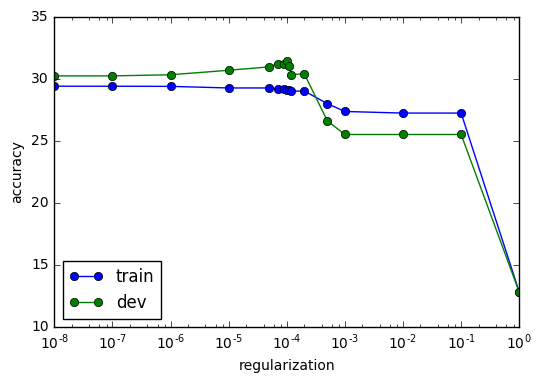

In [43]:
plt.plot([x["reg"] for x in results], [x["train"] for x in results],'-o')
plt.plot([x["reg"] for x in results], [x["dev"] for x in results],'-o')
plt.xscale('log')
plt.xlabel("regularization")
plt.ylabel("accuracy")
plt.legend(['train', 'dev'], loc='lower left')
plt.savefig("q4_reg_v_acc.png")
plt.show()